In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\Spam Ham Classification\\notebook\data\\transformed_data.csv")

In [7]:
df.shape

(5169, 6)

In [6]:
df.isnull().sum()

target            0
Text              0
num_characters    0
num_words         0
num_sentences     0
Transform Text    9
dtype: int64

In [2]:
df.shape

(5169, 6)

In [28]:
df.iloc[247:]

,target,Text,num_characters,num_words,num_sentences,Transform Text
247,0,"Wen ur lovable bcums angry wid u, dnt take it ...",179,41,2,wen ur lovable bcums angry wid u dnt take seri...
249,0,"Ups which is 3days also, and the shipping comp...",179,40,2,ups 3days also shipping company take 2wks way ...
250,0,"I'm back, lemme know when you're ready",38,11,1,back lem know ready
251,0,Don't necessarily expect it to be done before ...,97,20,1,necessarily expect done get back though headin
252,0,Mmm so yummy babe ... Nice jolt to the suzy,43,10,1,mmm yummy babe nice jolt suzy
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [8]:
# Removing null values row because in the transformation these null values 
# messages were containing the stopwords because their values comes to NaN 
df[df["Transform Text"].isnull()]

,target,Text,num_characters,num_words,num_sentences,Transform Text
248,0,What you doing?how are you?,27,8,1,NaN
939,0,Where @,7,2,1,NaN
2675,0,Can a not?,10,4,1,NaN
2935,0,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,49,1,1,NaN
3191,0,:),3,2,1,NaN
4019,0,G.W.R,5,1,1,NaN
4276,0,:( but your not here....,24,7,1,NaN
4500,0,:-) :-),7,6,1,NaN
4896,0,\ER,3,1,1,NaN


In [9]:
df.dropna(inplace=True)

In [10]:
df.to_csv("D:\Spam Ham Classification\\notebook\data\\model_build_data.csv", index=False)


In [31]:
df.isnull().sum()

target            0
Text              0
num_characters    0
num_words         0
num_sentences     0
Transform Text    0
dtype: int64

In [32]:
# 9 Rows were deleted  
df.shape

(5160, 6)

# BAG of WORDS 

In [33]:
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
BOW = CountVectorizer()
TFIDF = TfidfVectorizer()

# To array used because it gives only the dense matris means it eliminates the 
# sparse matrix and give only those matrix which contains values greater than zero and their index
X = BOW.fit_transform(df["Transform Text"]).toarray()
y = df["target"].values


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8914728682170543
[[809  97]
 [ 15 111]]
0.5336538461538461


In [10]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9728682170542635
[[886  20]
 [  8 118]]
0.855072463768116


In [11]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9699612403100775
[[904   2]
 [ 29  97]]
0.9797979797979798


In [12]:
!pip install xgboost

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [14]:
svc = SVC(kernel='sigmoid', gamma=1.0, )
knc = KNeighborsClassifier( )
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2, n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [15]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [16]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [17]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9166666666666666, 0.6587301587301587)

In [18]:
accuracy_scores = []
precision_scores = []



for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    

For  SVC
Accuracy -  0.9166666666666666
Precision -  0.6587301587301587


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9253875968992248
Precision -  1.0
For  NB
Accuracy -  0.9728682170542635
Precision -  0.855072463768116
For  DT
Accuracy -  0.9312015503875969
Precision -  0.8767123287671232
For  LR
Accuracy -  0.9689922480620154
Precision -  0.97
For  RF
Accuracy -  0.9670542635658915
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680232558139535
Precision -  0.9603960396039604
For  BgC
Accuracy -  0.9622093023255814
Precision -  0.8990825688073395
For  ETC
Accuracy -  0.9709302325581395
Precision -  0.9897959183673469
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.9230769230769231
For  xgb
Accuracy -  0.9738372093023255
Precision -  0.9626168224299065


In [19]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.925388,1.000000
5,RF,0.967054,1.000000
8,ETC,0.970930,0.989796
4,LR,0.968992,0.970000
10,xgb,0.973837,0.962617
6,AdaBoost,0.968023,0.960396
9,GBDT,0.952519,0.923077
7,BgC,0.962209,0.899083
3,DT,0.931202,0.876712
2,NB,0.972868,0.855072


In [20]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.925388
1,RF,Accuracy,0.967054
2,ETC,Accuracy,0.970930
3,LR,Accuracy,0.968992
4,xgb,Accuracy,0.973837
5,AdaBoost,Accuracy,0.968023
6,GBDT,Accuracy,0.952519
7,BgC,Accuracy,0.962209
8,DT,Accuracy,0.931202
9,NB,Accuracy,0.972868


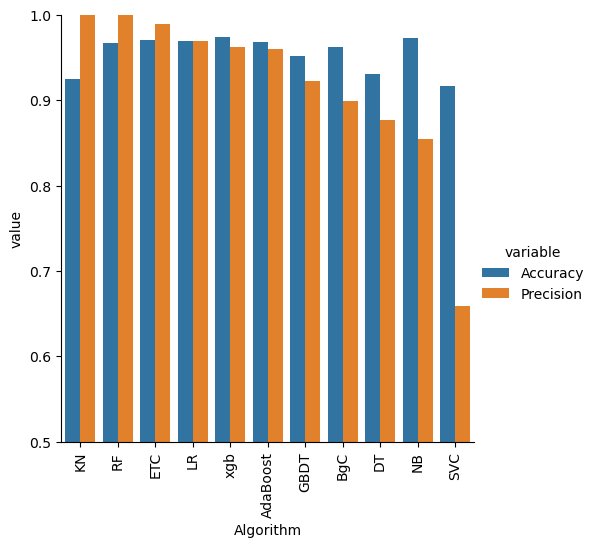

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## TFIDF Analysis

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 3000)
X_1 = tfidf.fit_transform(df["Transform Text"]).toarray()
y_1 = df["target"].values

In [23]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2,random_state=2)

In [24]:
accuracy_scores = []
precision_scores = []


for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_1,y_train_1,X_test_1,y_test_1)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9902912621359223


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9234496124031008
Precision -  0.9795918367346939
For  NB
Accuracy -  0.9757751937984496
Precision -  1.0
For  DT
Accuracy -  0.937984496124031
Precision -  0.8297872340425532
For  LR
Accuracy -  0.9563953488372093
Precision -  0.945054945054945
For  RF
Accuracy -  0.9670542635658915
Precision -  0.96
For  AdaBoost
Accuracy -  0.9699612403100775
Precision -  0.9702970297029703
For  BgC
Accuracy -  0.9602713178294574
Precision -  0.8512396694214877
For  ETC
Accuracy -  0.9815891472868217
Precision -  0.9908256880733946
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.898989898989899
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9035087719298246


In [25]:
tfidef_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
tfidef_df 

,Algorithm,Accuracy,Precision
2,NB,0.975775,1.000000
8,ETC,0.981589,0.990826
0,SVC,0.975775,0.990291
1,KN,0.923450,0.979592
6,AdaBoost,0.969961,0.970297
5,RF,0.967054,0.960000
4,LR,0.956395,0.945055
10,xgb,0.967054,0.903509
9,GBDT,0.954457,0.898990
7,BgC,0.960271,0.851240


## Max Features 3000 in TFIDF

In [26]:
max_fet_3000_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000_feat':accuracy_scores,'Precision_3000_feat':precision_scores}).sort_values('Precision_3000_feat',ascending=False)
max_fet_3000_df 

,Algorithm,Accuracy_3000_feat,Precision_3000_feat
2,NB,0.975775,1.000000
8,ETC,0.981589,0.990826
0,SVC,0.975775,0.990291
1,KN,0.923450,0.979592
6,AdaBoost,0.969961,0.970297
5,RF,0.967054,0.960000
4,LR,0.956395,0.945055
10,xgb,0.967054,0.903509
9,GBDT,0.954457,0.898990
7,BgC,0.960271,0.851240


In [27]:
perfo_tfidf_df=performance_df.merge(max_fet_3000_df, on= "Algorithm")
perfo_tfidf_df

,Algorithm,Accuracy,Precision,Accuracy_3000_feat,Precision_3000_feat
0,KN,0.925388,1.000000,0.923450,0.979592
1,RF,0.967054,1.000000,0.967054,0.960000
2,ETC,0.970930,0.989796,0.981589,0.990826
3,LR,0.968992,0.970000,0.956395,0.945055
4,xgb,0.973837,0.962617,0.967054,0.903509
5,AdaBoost,0.968023,0.960396,0.969961,0.970297
6,GBDT,0.952519,0.923077,0.954457,0.898990
7,BgC,0.962209,0.899083,0.960271,0.851240
8,DT,0.932171,0.878378,0.939922,0.833333
9,NB,0.972868,0.855072,0.975775,1.000000


## Using Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_2 = scaler.fit_transform(X)
y_2 = df["target"].values

In [42]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=2, test_size=0.2)

accuracy_scores = []
precision_scores = []


for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_1,y_train_1,X_test_1,y_test_1)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9902912621359223


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9234496124031008
Precision -  0.9795918367346939
For  NB
Accuracy -  0.9757751937984496
Precision -  1.0
For  DT
Accuracy -  0.939922480620155
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9563953488372093
Precision -  0.945054945054945
For  RF
Accuracy -  0.9670542635658915
Precision -  0.96
For  AdaBoost
Accuracy -  0.9699612403100775
Precision -  0.9702970297029703
For  BgC
Accuracy -  0.9602713178294574
Precision -  0.8512396694214877
For  ETC
Accuracy -  0.9815891472868217
Precision -  0.9908256880733946
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.898989898989899
For  xgb
Accuracy -  0.9670542635658915
Precision -  0.9035087719298246


In [30]:
max_scale_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accu_Max_Scale": current_accuracy,"Precision_Max_Scale": precision_scores}).sort_values("Precision_Max_Scale",ascending=False)
max_scale_df

,Algorithm,Accu_Max_Scale,Precision_Max_Scale
2,NB,0.967054,1.000000
8,ETC,0.967054,0.990826
0,SVC,0.967054,0.990291
1,KN,0.967054,0.979592
6,AdaBoost,0.967054,0.970297
5,RF,0.967054,0.960000
4,LR,0.967054,0.945055
10,xgb,0.967054,0.903509
9,GBDT,0.967054,0.898990
7,BgC,0.967054,0.851240


In [31]:
perfo_tfidf_df.merge(max_scale_df,on="Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_3000_feat,Precision_3000_feat,Accu_Max_Scale,Precision_Max_Scale
0,KN,0.925388,1.000000,0.923450,0.979592,0.967054,0.979592
1,RF,0.967054,1.000000,0.967054,0.960000,0.967054,0.960000
2,ETC,0.970930,0.989796,0.981589,0.990826,0.967054,0.990826
3,LR,0.968992,0.970000,0.956395,0.945055,0.967054,0.945055
4,xgb,0.973837,0.962617,0.967054,0.903509,0.967054,0.903509
5,AdaBoost,0.968023,0.960396,0.969961,0.970297,0.967054,0.970297
6,GBDT,0.952519,0.923077,0.954457,0.898990,0.967054,0.898990
7,BgC,0.962209,0.899083,0.960271,0.851240,0.967054,0.851240
8,DT,0.932171,0.878378,0.939922,0.833333,0.967054,0.833333
9,NB,0.972868,0.855072,0.975775,1.000000,0.967054,1.000000


In [32]:
X_train_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Convert NumPy arrays to lists of strings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



# Now create and fit the pipeline
pipeline = Pipeline([
    
    ("classifier", MultinomialNB())
])

param_grid = {
    
    'classifier__alpha': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train_1, y_train_1)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test_1, y_test_1)
print("Test Accuracy:", accuracy)



Best Hyperparameters: {'classifier__alpha': 0.1}
Test Accuracy: 0.9825581395348837


In [ ]:
import pandas as pd
pd.read